 **Выполнил:** Винокуров Олег группа 428
 
 
**Написать в функциональном стиле задачу приближенного вычисления корней функции:**

$$ 2(xy+y)y′+x(y4+1)=0 $$


**c точностью:** $$ϵ=10−12$$

Подключаю всякие библиотеки:

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from math import factorial

Начальные условия:

In [35]:
x=sympy.symbols('x')
y=sympy.Function('y')(x)
E=10**(-4)#Точность
x0=0.5
y0=1
h=0.1
yl=[] #Пустой список для 1й и 2й производной
XX=[x0] #Пустой список для отрисовки(x)
YY=[] #Пустой список для отрисовки(y)

Сам метод:

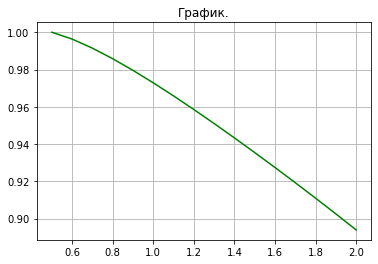

In [36]:
def Sympy(f,XX,YY):
    f=sympy.Add(f)
    f=f.subs({x:XX,y:YY})
    return float(f)

def Taylor (y1,y2,x): # ряд Тейлора
    T = 1+h*y1/(factorial(1))*(x-0.5)+(h/2)*y2/(factorial(2))*(x-0.5)**2
    return T

def Idiff(func): #производная неявной функции
    f=sympy.idiff(func,y,x)
    return f

function = -x*(y**4+1)/(2*(x*y+y)) #1я производная
val = Sympy(function,x0,y0)
yl.append(val)

func1=Idiff(function) #2я производная
val=Sympy(func1,x0,y0)
yl.append(val)
y0=taylor(yl[0],yl[1],x0)
YY.append(y0)

while abs ( x0 )<2:
    x0=x0+h #Изменение x
    XX.append(x0)
    
    y0=taylor(yl[0],yl[1],x0)
    YY.append(y0)
    
    val=Sympy(function,x0,y0) #Замена 1й производной при новом x
    yl[0]=val
    
    val=Sympy(func1,x0,y0) #Замена 2й производной при новом x
    yl[1]=val
    
    
plt.plot(XX,YY,'GREEN')
plt.title('График.')
plt.grid()
plt.show()
        
    